In [ ]:
from IPython import get_ipython
from IPython.display import display
# %% [markdown]
#
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Corrected the capitalization of LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from sklearn.metrics import accuracy_score

In [10]:
# loading the data from csv file to a pandas Dataframe
data =pd.read_csv('/content/insurance.csv')

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.shape

(1338, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

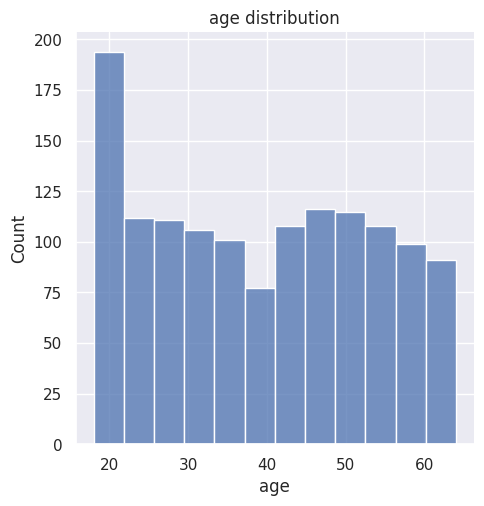

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['age'])
plt.title('age distribution')
plt.show()

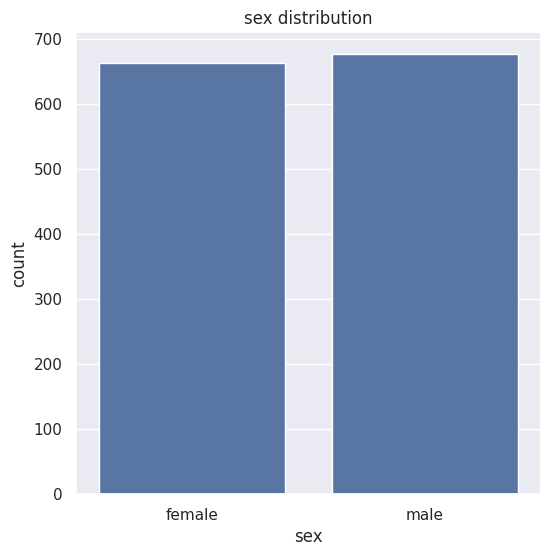

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('sex distribution')
plt.show()

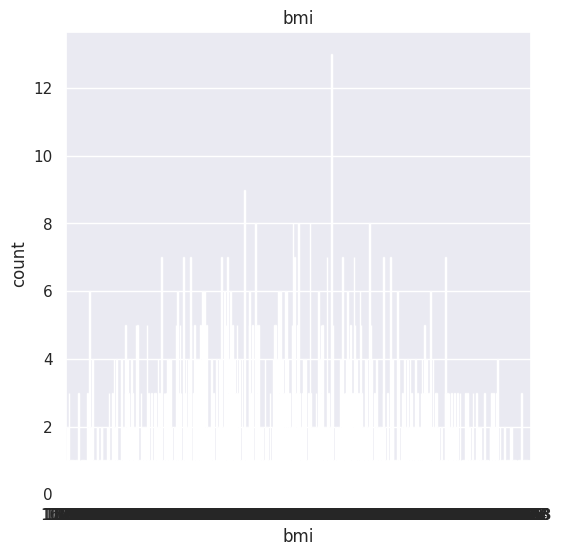

In [18]:
plt.figure(figsize=(6,6))
# Pass the entire data DataFrame to the data argument
sns.countplot(x='bmi',data=data) # Changed x to 'bmi' to count the distribution of bmi
plt.title('bmi')
plt.show()

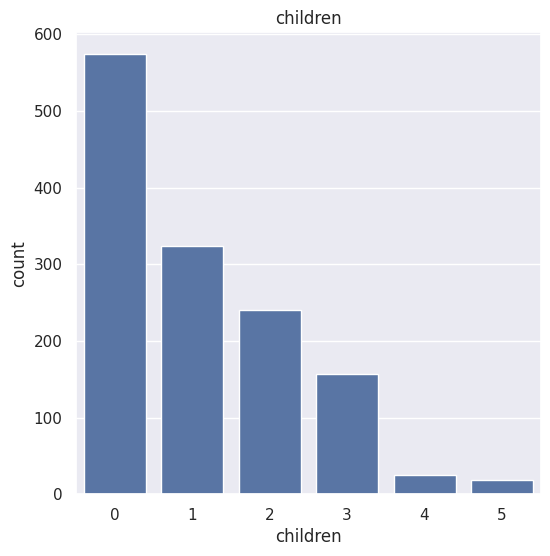

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('children')
plt.show()

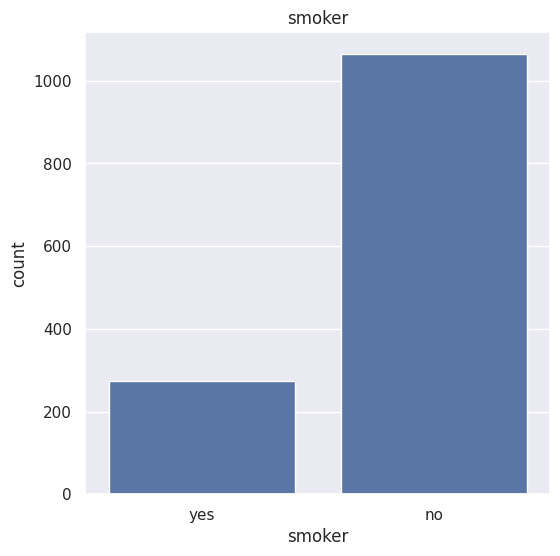

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('smoker')
plt.show()

In [21]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


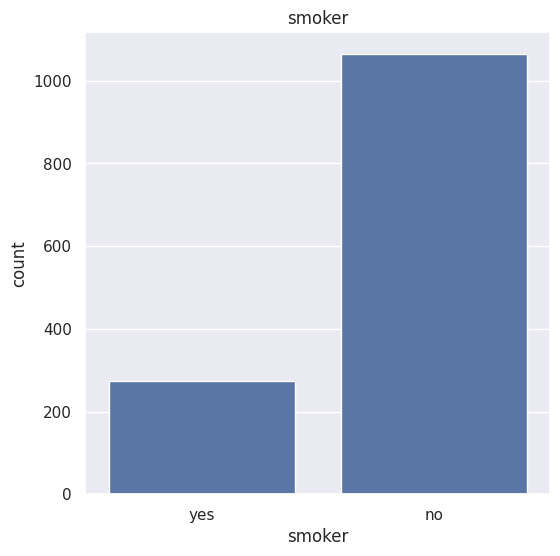

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('smoker')
plt.show()

In [23]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


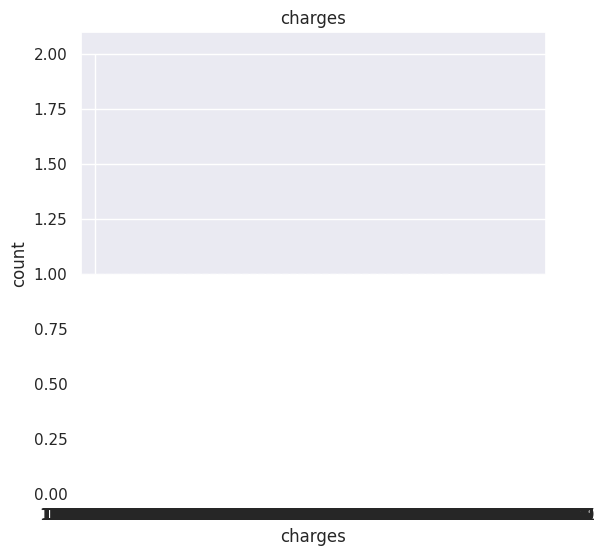

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='charges',data=data)
plt.title('charges')
plt.show()

In [25]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-25-1498815405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-25-1498815405.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-25-1498815405.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

In [26]:
X=data.drop(columns='charges',axis=1)
y=data['charges']


In [39]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
# Changed 'shape' to 'X.shape' to correctly access the shape attribute
# Also changed 'x' to 'X' for consistency
print(X.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [45]:
regressor=LinearRegression()

In [46]:
regressor.fit(x_train,y_train)

LinearRegression()

In [47]:
training_data_prediction=regressor.predict(x_train)

In [48]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('r squared value:',r2_train)

r squared value: 0.751505643411174


In [49]:
test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('r squared value:', r2_test)

r squared value: 0.7447273869684076


In [50]:
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('the insurance cost is usd',prediction[0])

[3760.0805765]
the insurance cost is usd 3760.080576496057


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
